In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from sklearn.datasets  import  load_iris
from sklearn import preprocessing
from pandas.api.types import is_string_dtype,is_numeric_dtype

In [2]:
#defining the sigmoid function
def sigmoid(a):
    s = 1 / (1 + np.exp(-a))    
    return s

In [3]:
def relu(a):
    return np.maximum(0.0, a)

## Data PreProcessing

In [4]:
pwd

'C:\\Users\\mahak\\Desktop'

In [5]:
#define a path variable and store the path
path="C:/Users/mahak/Downloads/Titanic_full (1).csv"

In [6]:
#read the data
my_df = pd.read_csv(path)
my_df.shape

(1309, 12)

In [7]:
#split the data 
def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]

mydf_train_valid,mydf_test=mydf_splitter(my_df,1100)
print(mydf_train_valid.shape,mydf_test.shape)

(1100, 12) (209, 12)


Text(0.5, 1.0, 'Correlation between the dataset features')

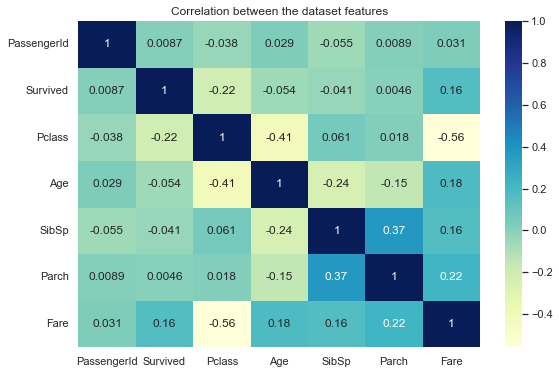

In [8]:
#Plotting correlation matrix to understand features better
sns.set_theme()
plt.subplots(figsize=(9, 6))
c=my_df.corr()
sns.heatmap(c,annot=True,cmap='YlGnBu')
plt.title("Correlation between the dataset features")

<AxesSubplot:xlabel='Feature', ylabel='Percent missing'>

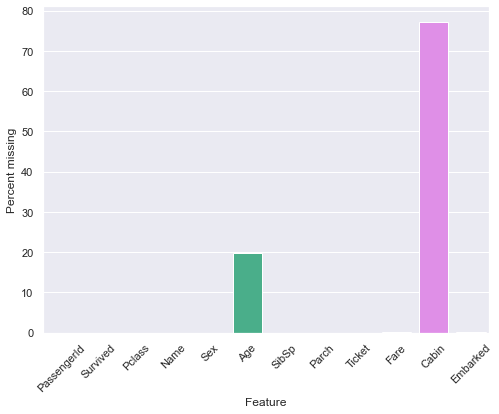

In [9]:
null_vals = mydf_train_valid.isnull().sum()/len(mydf_train_valid)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [10]:
# Function to change the datatype from object to category
def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df

In [11]:
# Here we can see that Age and Cabin has alot of missing values hence droping column Cabin from our dataframe
mydf_2 = my_df.drop("Cabin",axis = 1)
print(mydf_2.shape)
mydf_2.head(2)

(1309, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [12]:
mydf_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


In [13]:
mydf_3 = str_to_cat(mydf_2)
mydf_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     1309 non-null   int64   
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   category
 4   Sex          1309 non-null   category
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   category
 9   Fare         1308 non-null   float64 
 10  Embarked     1307 non-null   category
dtypes: category(4), float64(2), int64(5)
memory usage: 161.7 KB


In [14]:
# Functions to impute and preprocess the data
def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1
        
def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(my_df, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items(): 
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [15]:
#Imputing and preprocessing our data using the functions we have defined
mydf_4,my_table = mydf_preprocessor(mydf_3,null_table = None)
mydf_4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_na,Fare_na
0,1,0,3,156,2,22.0,1,0,721,7.2500,3,False,False
1,2,1,1,287,1,38.0,1,0,817,71.2833,1,False,False
2,3,1,3,524,1,26.0,0,0,915,7.9250,3,False,False
3,4,1,1,423,1,35.0,1,0,66,53.1000,3,False,False
4,5,0,3,23,2,35.0,0,0,650,8.0500,3,False,False


In [16]:
my_table

{'Age': 28.0, 'Fare': 14.4542}

In [17]:
#Seperating data with the prediction feature and predicting who survived
Y = mydf_4["Survived"]
X = mydf_4.drop(["Survived"],axis = 1)

print(X.shape,Y.shape)

(1309, 12) (1309,)


In [18]:
X_cat = X[['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch','Ticket', 'Embarked', 'Age_na', 'Fare_na']]
X_con = X.drop(X_cat,axis = 1)
print(X_cat.shape,X_con.shape)

(1309, 10) (1309, 2)


In [19]:
# preprocessing the data using standard scaler
scaler = preprocessing.StandardScaler().fit(X_con)
X_con_sc = pd.DataFrame(scaler.transform(X_con))
X_con_sc.columns = ["Age","Fare"]
print(X_con_sc.shape)

(1309, 2)


In [20]:
X_con_sc.head(2)

,Age,Fare
0,-0.581628,-0.503291
1,0.658652,0.734744


In [21]:
df_list = [X_cat,X_con_sc]
X_full = pd.concat(df_list,axis = 1)
print(X_full.shape)
X_full.head(2)

(1309, 12)


,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age_na,Fare_na,Age,Fare
0,1,3,156,2,1,0,721,3,False,False,-0.581628,-0.503291
1,2,1,287,1,1,0,817,1,False,False,0.658652,0.734744


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_full, Y, test_size=0.1, random_state=42)

In [23]:
X_train,X_test = mydf_splitter(X_full,1100)

print(X_train.shape,X_test.shape)

(1100, 12) (209, 12)


In [24]:
Y_train,Y_test = mydf_splitter(Y,1100)

print(Y_train.shape,Y_test.shape)

(1100,) (209,)


In [25]:
X_train.head(2)

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Age_na,Fare_na,Age,Fare
0,1,3,156,2,1,0,721,3,False,False,-0.581628,-0.503291
1,2,1,287,1,1,0,817,1,False,False,0.658652,0.734744


In [26]:
X_train = X_train.drop(["Age_na","Fare_na"],axis=1)
X_test = X_test.drop(["Age_na","Fare_na"],axis=1)

In [27]:
x_train= X_train.to_numpy()
x_test= X_test.to_numpy()
y_train= Y_train.to_numpy()
y_test= Y_test.to_numpy()

In [28]:
x_train_1= x_train.reshape(x_train.shape[1], x_train.shape[0])
x_test_1= x_test.reshape(x_test.shape[1], x_test.shape[0])
y_train_1= y_train.reshape(1, y_train.shape[0])
y_test_1= y_test.reshape(1, y_test.shape[0])

In [29]:
print(x_train_1.shape)
print(y_train_1.shape)

(10, 1100)
(1, 1100)


In [30]:
print(x_test_1.shape)
print(y_test_1.shape)

(10, 209)
(1, 209)


In [31]:
#This function creates a vector of zeros of shape with dim as the size of the w vector we want and
# Returns: w which is initialized vector of shape (dim, 1) and b which is initialized scalar 
def initialize_with_zeros(dim):
    w = np.zeros([dim, 1], dtype="float64")
    b = 0.0
    return w, b

In [32]:
# This function implements the cost function and its gradient for the propagation with w as weights, b as bias(a scalar)
# X as data size and Y a true "label" vector 
def propagate(w, b, X, Y, function):
    m = X.shape[1] 
    if function=="relu":
        A = relu(np.dot(w.T, X) + b)    
    else:
        A = sigmoid(np.dot(w.T, X) + b)

    cost = -(np.sum(Y * np.log(A) + (1.0 - Y) * np.log(1.0 - A))) / m

    dw = np.dot(X, (A - Y).T) / m
    db = np.sum(A - Y) / m

    cost = np.squeeze(np.array(cost))
    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [33]:
# defining function to divide the batches for stochastic gradient decent function
def next_batch(X, y, batchSize):
# loop over our dataset "X" in mini-batches, yielding a tuple of
# the current batched data and labels
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i + batchSize], y[i:i + batchSize])

In [34]:
#Defining the Gradient Decent function with 100 iterations and other parameters which are w(weights), b(bias), 
#X(training set), Y(actual values for the training set)

In [35]:
#This function gives us the gardient decent that is the change in value of of W and b by giving the parameters which are w(weights), b(bias), X(training set), Y(actual values for the training set)

def stochastic_gradient_decent(w, b, X, Y, batch, function, num_iterations=100, learning_rate=0.009):
    costs = []

    for i in range(0,num_iterations,5):
        for (bX, bY) in next_batch(X, Y, batch):
            grads, cost = propagate(w, b, bX, bY, function)

            dw = grads["dw"]
            db = grads["db"]

            w = w - learning_rate * dw
            b = b - learning_rate * db


            if i % 100 == 0:
                costs.append(cost)
                print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

Predicting dataset values

In [36]:
#predicting values of our dataset.
# If the sigmoid function is less than 0.5 then it is taken as 0 else 1
def predict(w, b, X, function):
    m = X.shape[1]
    w = w.reshape(X.shape[0], 1)
    Y_prediction = np.zeros((1, m))
    if function=="relu":
        A = relu(np.dot(w.T, X) + b)    
    else:
        A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        if A[0, i] > 0 and A[0, i] < 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1

    return Y_prediction

Combining all the functions to bring model together

In [37]:
# Defining the model function that combines all aforementioned defined functions to bring the modeltogether.

c = []
def model(X_train, Y_train, X_test, Y_test, batch, function, num_iterations=2000, learning_rate=0.5):
    w, b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs = stochastic_gradient_decent(
        w, b, X_train, Y_train, batch, function, num_iterations, learning_rate)
    w = params["w"]
    b = params["b"]

    Y_prediction_test = predict(w, b, X_test, function)
    Y_prediction_train = predict(w, b, X_train, function)

    print("train accuracy: {} %".format(
        100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(
        100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    c.append(costs)
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    return d

Sigmoid function

In [38]:
logistic_regression_model = model(x_train_1, y_train_1, x_test_1, y_test_1, 20, "sigmoid", num_iterations=1000, learning_rate=0.001)

Cost after iteration 0: 0.693147
Cost after iteration 100: nan
Cost after iteration 200: 18.057492
Cost after iteration 300: nan
Cost after iteration 400: 12.205165
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: inf
Cost after iteration 800: nan
Cost after iteration 900: inf
train accuracy: 41.27272727272727 %
test accuracy: 44.49760765550239 %


C:\Users\mahak\AppData\Local\Temp\ipykernel_24024\3711994095.py:10: RuntimeWarning: divide by zero encountered in log
  cost = -(np.sum(Y * np.log(A) + (1.0 - Y) * np.log(1.0 - A))) / m
C:\Users\mahak\AppData\Local\Temp\ipykernel_24024\3711994095.py:10: RuntimeWarning: invalid value encountered in multiply
  cost = -(np.sum(Y * np.log(A) + (1.0 - Y) * np.log(1.0 - A))) / m
C:\Users\mahak\AppData\Local\Temp\ipykernel_24024\1284453628.py:3: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-a))


In [40]:
def calculate_metrics(true, prediction):
    fp = 0
    fn = 0
    tp = 0
    tn = 0
    for true_value, prediction_value in zip(true, prediction):
        if prediction_value == true_value:
            if prediction_value == 1:
                tp += 1
            else:
                tn += 1
        else:
            if prediction_value == 1:
                fp += 1
            else:
                fn += 1
    return fp, fn, tp, tn

In [41]:
def cal_precision(true, predicted):
    false_positive, false_negative, true_positive, true_negative = calculate_metrics(true, predicted)
    precision = true_positive/(false_positive+true_positive)
    return precision

In [42]:
def cal_recall(true, predicted):
    false_positive, false_negative, true_positive, true_negative = calculate_metrics(true, predicted)
    recall = true_positive/(false_negative+true_positive)
    return recall

In [43]:
def cal_f1_score(true, predicted):
    precision = cal_precision(true, predicted)
    print("precision = ", precision)
    recall = cal_recall(true, predicted)
    print("recall = ",recall)
    f1 = (2*precision*recall)/(precision+recall)
    print("F1-Score=",f1)
    return f1

In [44]:
Y_prediction_test = logistic_regression_model["Y_prediction_test"]

In [45]:
#calculating precision,recall,F-1 score with sigmoid function
cal=cal_f1_score(y_test_1[0], Y_prediction_test[0])
# print(cal)

precision =  0.4233128834355828
recall =  0.7582417582417582
F1-Score= 0.5433070866141733


In [49]:
#As we have implemented single neural network the accuracy is not at its best. 
#Once the layers will be increased, the accuracy can be increased

Relu Function

In [46]:
logistic_regression_model_relu = model(x_train_1, y_train_1, x_test_1, y_test_1, 20, "relu", num_iterations=1000, learning_rate=0.001)

Cost after iteration 0: nan
Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: nan
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
train accuracy: 37.63636363636363 %
test accuracy: 43.54066985645934 %


C:\Users\mahak\AppData\Local\Temp\ipykernel_24024\3711994095.py:10: RuntimeWarning: divide by zero encountered in log
  cost = -(np.sum(Y * np.log(A) + (1.0 - Y) * np.log(1.0 - A))) / m
C:\Users\mahak\AppData\Local\Temp\ipykernel_24024\3711994095.py:10: RuntimeWarning: invalid value encountered in multiply
  cost = -(np.sum(Y * np.log(A) + (1.0 - Y) * np.log(1.0 - A))) / m
C:\Users\mahak\AppData\Local\Temp\ipykernel_24024\3711994095.py:10: RuntimeWarning: invalid value encountered in log
  cost = -(np.sum(Y * np.log(A) + (1.0 - Y) * np.log(1.0 - A))) / m


In [47]:
Y_prediction_test_relu = logistic_regression_model_relu["Y_prediction_test"]

In [48]:
#calculating precision,recall,F-1 score with relu function
cal_relu=cal_f1_score(y_test_1[0], Y_prediction_test_relu[0])

precision =  0.4354066985645933
recall =  1.0
F1-Score= 0.6066666666666667
